In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/t20i_Matches_Data_scaled01.csv'
df = pd.read_csv(file_path)

# Identify numeric columns related to the match data
numeric_cols = ['Team1 Runs Scored', 'Team1 Wickets Fell', 'Team2 Runs Scored', 'Team2 Wickets Fell']

# Compute Q1, Q3, and IQR for the numerical columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers based on IQR
condition = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df_cleaned = df[condition]

# Check the new shape after removing outliers
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)

Mounted at /content/drive
Original shape: (2591, 14)
Cleaned shape: (2517, 14)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


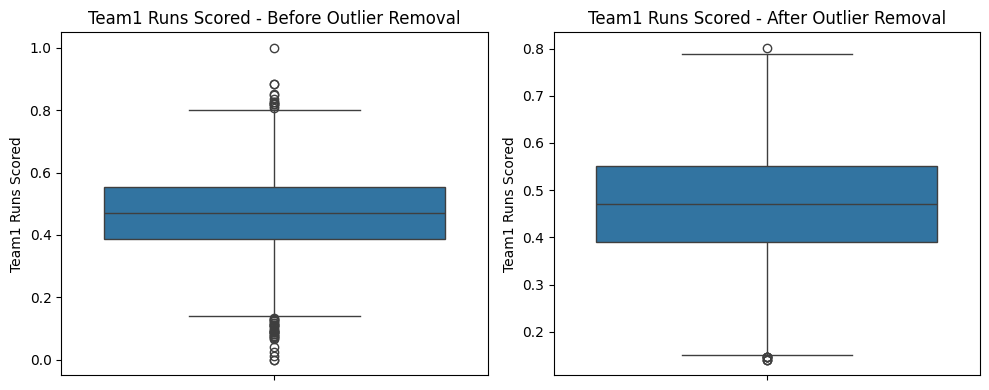

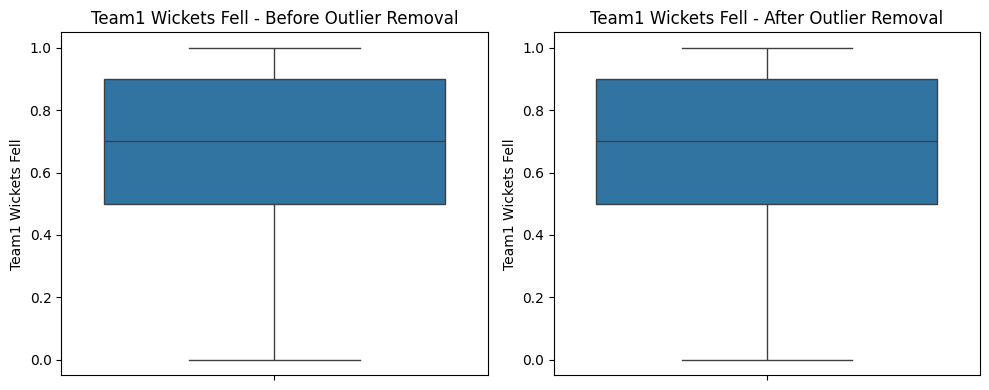

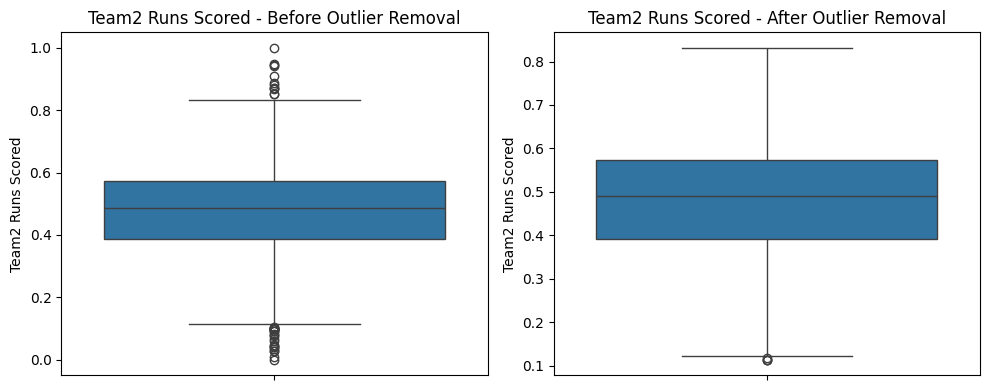

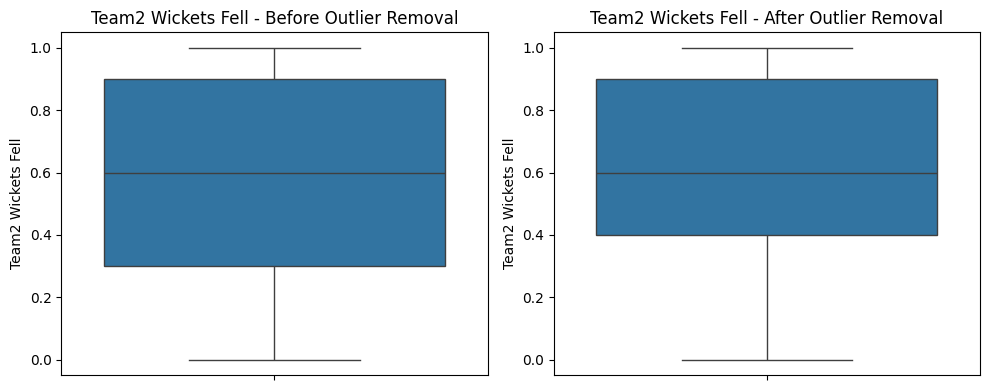

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/t20i_Matches_Data_scaled01.csv'
df = pd.read_csv(file_path)
# Assuming df is the DataFrame before outlier removal
# Assuming df_cleaned is the DataFrame after outlier removal

# List of the 4 specific columns you want to visualize
cols_to_visualize = [
    'Team1 Runs Scored',
    'Team1 Wickets Fell',
    'Team2 Runs Scored',
    'Team2 Wickets Fell'
]

# Loop only through the specified columns
for col in cols_to_visualize:
    # Ensure the column exists in both DataFrames before plotting
    if col in df.columns and col in df_cleaned.columns:
        plt.figure(figsize=(10, 4))

        # Plot 1: Before Outlier Removal
        plt.subplot(1, 2, 1)
        sns.boxplot(y=df[col])
        plt.title(f'{col} - Before Outlier Removal')

        # Plot 2: After Outlier Removal
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df_cleaned[col])
        plt.title(f'{col} - After Outlier Removal')

        plt.tight_layout()
        plt.show()
    else:
        print(f"Warning: Column '{col}' not found in one or both DataFrames. Skipping visualization.")